### **Normalizar los datos con MinMaxScaler**

In [1]:
import pandas as pd

train = pd.read_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv')
train = train.drop('TOTAL_QUALITY', axis=1)
train.shape

(3328000, 29)

In [2]:
train

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.576516e-07,4056.169891,4615.064561,4860.564590,4823.540972,4609.401401,4171.841248,4559.468272,4989.015673,5172.686217,...,5675.337834,5151.002115,4707.789536,4398.367754,6089.284961,6771.404570,7438.069567,6669.423292,5630.821868,4623.309451
1,7.542156e-07,-1380.929375,-1571.001716,-1657.905345,-1651.350905,-1592.018593,-1464.307048,-1554.299347,-1699.713259,-1758.991002,...,-1934.629306,-1771.422380,-1630.839892,-1533.004836,-2073.845313,-2306.734806,-2534.081789,-2277.990844,-1933.910172,-1602.700984
2,8.541766e-07,778.647793,884.672809,934.320458,932.875795,905.258424,841.992880,879.408172,960.130623,990.422765,...,1090.742947,1006.486904,932.493905,881.462092,1172.553631,1304.517622,1433.132382,1290.066921,1099.605102,918.688599
3,8.492130e-07,-528.796888,-599.676481,-633.437784,-633.614988,-618.266583,-580.269756,-599.903273,-653.580317,-671.583717,...,-740.146000,-687.929735,-641.082994,-609.195935,-799.399481,-889.548105,-977.234188,-880.368138,-752.813723,-633.601262
4,1.454839e-06,394.505594,446.391109,471.450107,472.302465,463.200141,438.229928,449.853619,488.911059,500.214992,...,551.490255,516.190174,483.725155,462.003664,599.108065,666.796652,732.483531,660.171706,566.086633,479.742965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327995,-9.182857e-09,21306.232598,21449.708067,19844.267949,17595.034414,15369.336273,12882.590706,48464.575541,28346.052209,22776.720741,...,17199.624658,15298.509397,13497.299619,12647.219768,18127.640550,19148.994682,18462.175902,16997.056839,14805.484193,12862.225311
3327996,8.861883e-09,22701.916767,22822.828935,21240.140775,18972.383237,16622.556738,13949.678018,48733.240293,29437.221724,24123.955375,...,18692.159957,16592.392871,14611.241047,13684.777241,19560.945633,20543.187914,19837.878543,18294.752346,15987.233093,13908.455760
3327997,-8.783567e-09,23962.209352,23770.085184,21959.951504,19482.169112,17029.427382,14280.668092,49974.864309,30534.814632,24993.980828,...,19093.906226,16980.897058,14980.345924,14035.397539,20785.455633,21473.295930,20598.965152,18914.286646,16450.687938,14282.977139
3327998,9.350670e-09,23722.367899,23832.227080,22217.119046,19885.204210,17444.998570,14653.104392,49245.799643,30422.636985,25175.287198,...,19683.118142,17465.089290,15375.989826,14400.162989,21306.650870,21926.110690,21052.404547,19343.849966,16858.499117,14648.200143


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
train.shape

(3328000, 29)

### **Definir modelo CNN-AutoEncoder**

In [4]:
# reshape input into [samples, timesteps, features]

train = train.reshape((4000, 832, 29))
train.shape

(4000, 832, 29)

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential([
    # encoder
    layers.Conv1D(128, 3, activation='relu', padding='same', input_shape=(832, 29)),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    # decoder
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.UpSampling1D(2),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.UpSampling1D(2),
    layers.Conv1D(29, 3, activation='relu', padding='same'),
])

model.compile(optimizer='rmsprop', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 832, 128)          11264     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 832, 128)          49280     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 416, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 416, 128)          49280     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 416, 128)          49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 208, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 208, 128)          4

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)]

history = model.fit(train, train, callbacks=early_stop, epochs=10, batch_size=64, validation_split=0.1)

Train on 3600 samples, validate on 400 samples
Epoch 1/10
3600/3600 [==============================] - 6s 2ms/sample - loss: 0.0181 - val_loss: 0.0034
Epoch 2/10
3600/3600 [==============================] - 2s 675us/sample - loss: 0.0045 - val_loss: 0.0041
Epoch 3/10
3600/3600 [==============================] - 2s 674us/sample - loss: 0.0045 - val_loss: 0.0063
Epoch 4/10
3600/3600 [==============================] - 3s 711us/sample - loss: 0.0037 - val_loss: 0.0016
Epoch 5/10
3600/3600 [==============================] - 2s 676us/sample - loss: 0.0032 - val_loss: 0.0048
Epoch 6/10
3600/3600 [==============================] - 3s 702us/sample - loss: 0.0029 - val_loss: 0.0015
Epoch 7/10
3600/3600 [==============================] - 3s 696us/sample - loss: 0.0026 - val_loss: 0.0036
Epoch 8/10
3600/3600 [==============================] - 2s 684us/sample - loss: 0.0025 - val_loss: 0.0017
Epoch 9/10
3600/3600 [==============================] - 2s 677us/sample - loss: 0.0025 - val_loss: 0.0029


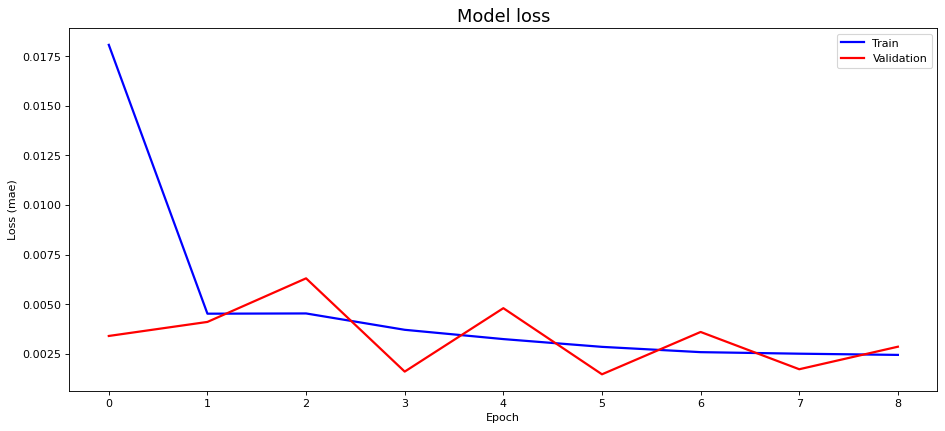

In [7]:
from matplotlib import pyplot as plt

# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [8]:
import numpy as np

pred_train = model.predict(train)

mean = np.mean(np.abs(pred_train-train), axis=2)
print(mean.shape)
mean = np.mean(mean, axis=1)
print(mean.shape)

threshold = mean.mean()+3*mean.std()
threshold

(4000, 832)
(4000,)


0.0031368534501298668

In [9]:
test = pd.read_csv('Z:\\Descargas\\composite\\deepl\\test_incorrect.csv')
test = test.drop('TOTAL_QUALITY', axis=1)

test = scaler.transform(test)
test = test.reshape((4959, 832, 29))

pred_test = model.predict(test)

In [10]:
draw_train = np.mean(np.abs(pred_train-train), axis=2)
draw_train = np.mean(draw_train, axis=1)

draw_test = np.mean(np.abs(pred_test-test), axis=2)
draw_test = np.mean(draw_test, axis=1)

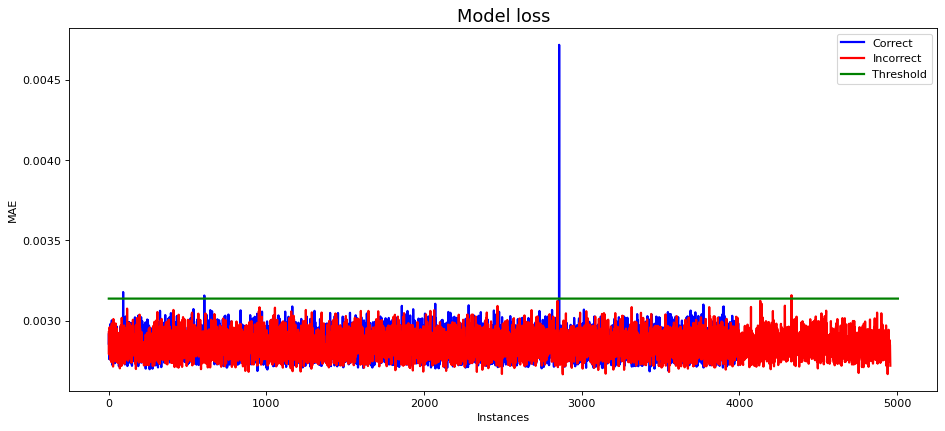

In [11]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(draw_train, 'b', label='Correct', linewidth=2)
ax.plot(draw_test, 'r', label='Incorrect', linewidth=2)
ax.plot(np.full(shape=5007, fill_value=threshold), 'g', label='Threshold', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('MAE')
ax.set_xlabel('Instances')
ax.legend(loc='upper right')
plt.show()